In [138]:
import pandas as pd
import numpy as np
import librosa
import pyAudioAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score

In [133]:
def get_accuray_score_for_each_label(y_predict,y_true):
    values= list(set(y_true))
    for i in values:
        ii = list(np.where(y_true == i)[0])
        g = list(y_predict[ii])
        t = [i] * len(ii)
        print("accuracy of class %d: %f" % (i,accuracy_score(g,t)) )

In [12]:
path="D:\\Courses\\MachineLearning\\Project\\opensmile"
train = pd.read_pickle(path+"\\train.pkl")
test  = pd.read_pickle(path+"\\test.pkl")
devel = pd.read_pickle(path+"\\deve.pkl") 

In [55]:
classes={'neutral':0,'happy':1,'sad':2,'angry':3}

In [66]:
m = len(train.columns) -1
train_numpy = np.zeros((0,m))
train_outcomes=[]
for index,row in train.iterrows():
    r = np.array(row[0:1582])
    train_numpy=np.vstack((train_numpy,r))
    train_outcomes.append(classes.get(row['y']))

In [77]:
train_numpy.astype(float)

array([[7.800000e+01, 0.000000e+00, 6.519988e-01, ..., 6.250000e-02,
        5.000000e+00, 2.080000e+00],
       [4.000000e+01, 9.700000e+01, 1.085374e+00, ..., 6.060606e-02,
        1.000000e+00, 1.200000e+00],
       [4.100000e+01, 3.000000e+00, 1.089203e+00, ..., 4.000000e-02,
        2.000000e+00, 7.500000e-01],
       ...,
       [1.050000e+02, 1.980000e+02, 1.026502e+00, ..., 5.714286e-02,
        2.000000e+00, 2.040000e+00],
       [2.200000e+01, 1.090000e+02, 7.835698e-01, ..., 2.970297e-02,
        6.000000e+00, 2.390000e+00],
       [2.000000e+02, 7.000000e+01, 8.999343e-01, ..., 1.123596e-02,
        9.000000e+00, 2.980000e+00]])

In [79]:
train_outcomes = np.array(train_outcomes)

In [82]:
devel_numpy = np.zeros((0,m))
devel_outcomes=[]
for index,row in devel.iterrows():
    r = np.array(row[0:1582])
    devel_numpy=np.vstack((devel_numpy,r))
    devel_outcomes.append(classes.get(row['y']))

devel_numpy.astype(float)
devel_outcomes = np.array(devel_outcomes)

# Linear SVM classifier One vs ALL

In [91]:
M = OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_numpy, train_outcomes)

D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [92]:
from sklearn.metrics import accuracy_score
pre= M.predict(devel_numpy) 
accuracy_score(pre, devel_outcomes)

0.579

In [89]:
test_numpy = np.zeros((0,m))
test_outcomes=[]
for index,row in test.iterrows():
    r = np.array(row[0:1582])
    test_numpy=np.vstack((test_numpy,r))
    test_outcomes.append(classes.get(row['y']))

test_numpy.astype(float)
test_outcomes = np.array(test_outcomes)

In [93]:
pred = M.predict(test_numpy)

In [94]:
accuracy_score(pred, test_outcomes)

0.5835835835835835

# Logistic Regression One vs ALL

In [119]:
LM = OneVsRestClassifier(LogisticRegression(solver='sag',random_state=None,penalty='l2')).fit(train_numpy, train_outcomes)

D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Courses\InfoStorage\Anaconda\envs\cs670\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [120]:
p = LM.predict(devel_numpy)

In [121]:
accuracy_score(p, devel_outcomes)

0.6756666666666666

In [122]:
plog = LM.predict(test_numpy)
accuracy_score(plog, test_outcomes)

0.6896896896896897

In [134]:
get_accuray_score_for_each_label(plog,test_outcomes)

accuracy of class 0: 0.985528
accuracy of class 1: 0.036866
accuracy of class 2: 0.000000
accuracy of class 3: 0.000000


In [135]:
get_accuray_score_for_each_label(p,devel_outcomes)

accuracy of class 0: 0.981225
accuracy of class 1: 0.057828
accuracy of class 2: 0.000000
accuracy of class 3: 0.000000


In [143]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
def reporting(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, target_names=np.unique(train_outcomes))
    print(confusion_matrix)
    print("\n",classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

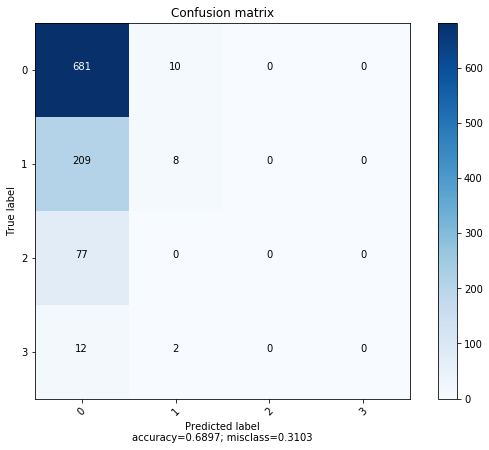

<function confusion_matrix at 0x000001A4380C8AE8>

               precision    recall  f1-score   support

           0       0.70      0.99      0.82       691
           1       0.40      0.04      0.07       217
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        14

   micro avg       0.69      0.69      0.69       999
   macro avg       0.27      0.26      0.22       999
weighted avg       0.57      0.69      0.58       999

0.6896896896896897


In [144]:
reporting(test_outcomes,plog)

# AdaBoost + Decision Tree One vs ALL

In [147]:
model = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(), 
                                               n_estimators=100, learning_rate=10.0)).fit(train_numpy, train_outcomes)
model_outcomes = model.predict(devel_numpy)
get_accuray_score_for_each_label(model_outcomes,devel_outcomes)

model_outcomes_test = model.predict(test_numpy)
get_accuray_score_for_each_label(model_outcomes_test,test_outcomes)

accuracy of class 0: 0.446640
accuracy of class 1: 0.220028
accuracy of class 2: 0.175214
accuracy of class 3: 0.181818
accuracy of class 0: 0.415340
accuracy of class 1: 0.235023
accuracy of class 2: 0.155844
accuracy of class 3: 0.285714


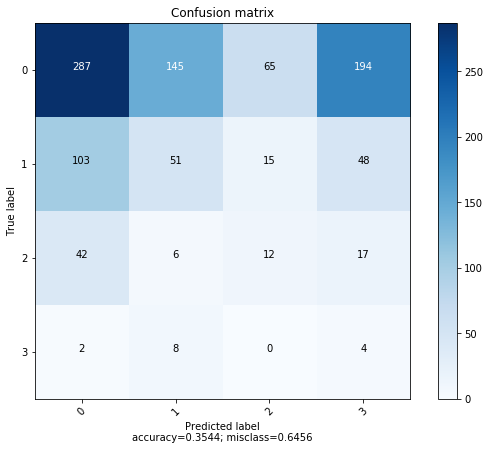

<function confusion_matrix at 0x000001A4380C8AE8>

               precision    recall  f1-score   support

           0       0.66      0.42      0.51       691
           1       0.24      0.24      0.24       217
           2       0.13      0.16      0.14        77
           3       0.02      0.29      0.03        14

   micro avg       0.35      0.35      0.35       999
   macro avg       0.26      0.27      0.23       999
weighted avg       0.52      0.35      0.42       999

0.35435435435435436


In [148]:
reporting(test_outcomes,model_outcomes_test)

In [149]:
accuracy_score(model_outcomes_test, test_outcomes)

0.35435435435435436

# AdaBoost -> Decision Tree plain

In [152]:
testing_model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, learning_rate=10.0)
testing_model.fit(train_numpy, train_outcomes)

mo = testing_model.predict(devel_numpy)
get_accuray_score_for_each_label(mo,devel_outcomes)

mot = testing_model.predict(test_numpy)
get_accuray_score_for_each_label(mot,test_outcomes)

accuracy of class 0: 0.671443
accuracy of class 1: 0.270804
accuracy of class 2: 0.136752
accuracy of class 3: 0.060606
accuracy of class 0: 0.657019
accuracy of class 1: 0.235023
accuracy of class 2: 0.090909
accuracy of class 3: 0.071429


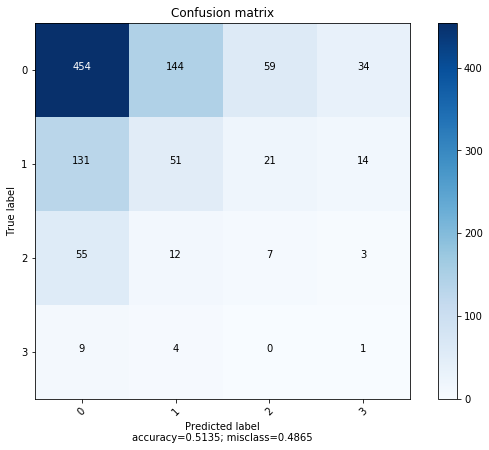

<function confusion_matrix at 0x000001A4380C8AE8>

               precision    recall  f1-score   support

           0       0.70      0.66      0.68       691
           1       0.24      0.24      0.24       217
           2       0.08      0.09      0.09        77
           3       0.02      0.07      0.03        14

   micro avg       0.51      0.51      0.51       999
   macro avg       0.26      0.26      0.26       999
weighted avg       0.54      0.51      0.53       999

0.5135135135135135


In [153]:
reporting(test_outcomes,mot)

    One vs ALL    |  Normal

0     0.66            0.70
1     0.24            0.24
2     0.13            0.08
3     0.02            0.02

# Plotting a graph of our feature set ( clusters )

In [234]:
import time
from sklearn.manifold import TSNE
from ggplot import ggplot
from ggplot import aes
from ggplot import *

In [227]:
classes={'neutral':0,'happy':1,'sad':2,'angry':3}

In [228]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(train_numpy)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3342 samples in 0.193s...
[t-SNE] Computed neighbors for 3342 samples in 12.845s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3342
[t-SNE] Computed conditional probabilities for sample 2000 / 3342
[t-SNE] Computed conditional probabilities for sample 3000 / 3342
[t-SNE] Computed conditional probabilities for sample 3342 / 3342
[t-SNE] Mean sigma: 325.715666
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.830864
[t-SNE] KL divergence after 300 iterations: 1.505066


In [229]:
def get_val(m):
    return classes.get(m)

In [232]:
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label']  = train['y']
df_tsne['label_val'] = df_tsne['label'].apply(get_val)
df_tsne.head()

,x-tsne,y-tsne,label,label_val
0,-10.299351,-2.380432,neutral,0
1,9.483095,-8.053562,neutral,0
2,10.132236,-6.890546,neutral,0
3,10.437280,1.161751,neutral,0
4,8.326704,-1.092001,neutral,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

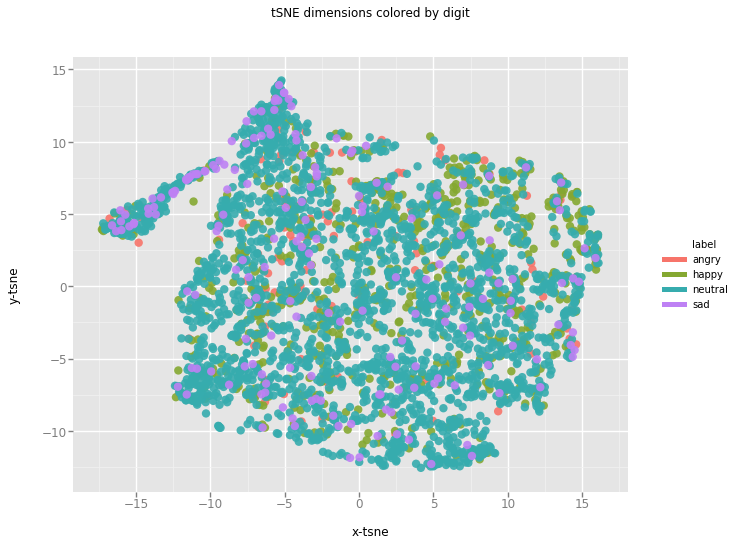

<ggplot: (-9223371924070294640)>

In [247]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.9) \
        + ggtitle("tSNE dimensions colored by digit") 
chart

In [196]:
dummy=train[train.y !='neutral'] #remove all neutral values

In [209]:
dummy= dummy.reset_index(drop=True)

In [210]:
dummy.head()

,0,1,2,3,4,5,6,7,8,9,...,1573,1574,1575,1576,1577,1578,1579,1580,1581,y
0,238.0,206.0,0.799783,-0.000110,0.831603,0.532165,0.447065,0.668883,1.325042,4.869779,...,0.013956,0.018019,0.015398,0.033417,0.111886,0.036517,0.011236,22.0,5.82,happy
1,273.0,1039.0,0.743576,-0.000225,0.895054,0.370672,0.194116,0.449194,0.689754,2.653036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,13.49,sad
2,329.0,748.0,0.536119,-0.000261,0.706916,0.316381,0.161472,0.413776,1.070213,4.724927,...,0.018065,0.020010,0.019796,0.039806,0.098367,0.031175,0.004796,35.0,13.12,angry
3,51.0,127.0,0.747436,-0.003094,1.047554,0.531200,0.476492,0.711916,1.458647,5.427429,...,0.008083,0.009108,0.009189,0.018297,0.069254,0.064220,0.018349,6.0,1.97,angry
4,21.0,272.0,0.827632,-0.001171,0.989180,0.381276,0.223891,0.482342,0.607182,2.846712,...,0.007783,0.007337,0.007675,0.015012,0.044029,0.094118,0.023529,8.0,2.79,happy


In [211]:
t_numpy = np.zeros((0,m))
t_outcomes= []
for index,row in dummy.iterrows():
    r = np.array(row[0:1582])
    t_numpy=np.vstack((t_numpy,r))
    t_outcomes.append(classes.get(row['y']))

t_numpy.astype(float)
t_outcomes = np.array(t_outcomes)

In [212]:
tsne_split = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_split = tsne.fit_transform(t_numpy)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1055 samples in 0.049s...
[t-SNE] Computed neighbors for 1055 samples in 1.840s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1055
[t-SNE] Computed conditional probabilities for sample 1055 / 1055
[t-SNE] Mean sigma: 418.992821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.322178
[t-SNE] KL divergence after 300 iterations: 0.786792


In [213]:
df_tsne_split = pd.DataFrame()
df_tsne_split['x-tsne'] = tsne_results_split[:,0]
df_tsne_split['y-tsne'] = tsne_results_split[:,1]
df_tsne_split['label'] = dummy['y']
df_tsne_split['label_val'] = df_tsne_split['label'].apply(get_val)
df_tsne_split.head()

,x-tsne,y-tsne,label,label_val
0,10.233056,-13.058981,happy,1
1,2.591539,17.357203,sad,2
2,10.302809,7.383386,angry,3
3,-2.829367,9.397593,angry,3
4,-3.589141,14.209531,happy,1


In [214]:
df_tsne_split.head()

,x-tsne,y-tsne,label,label_val
0,10.233056,-13.058981,happy,1
1,2.591539,17.357203,sad,2
2,10.302809,7.383386,angry,3
3,-2.829367,9.397593,angry,3
4,-3.589141,14.209531,happy,1


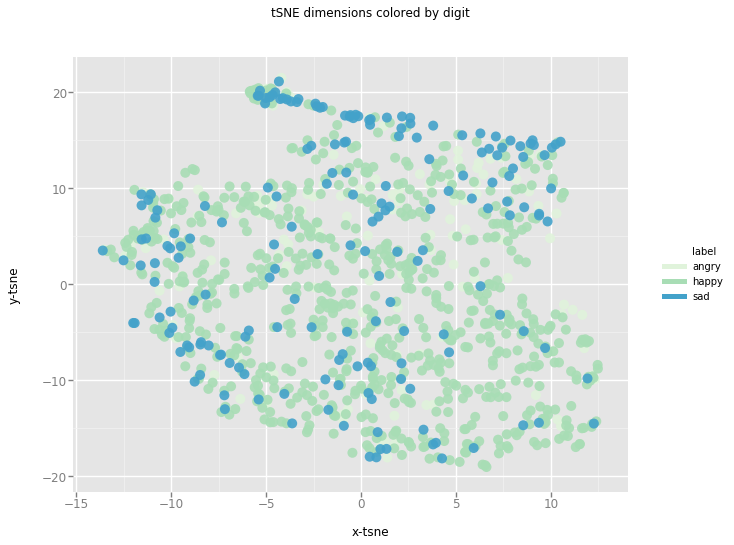

<ggplot: (112783281100)>

In [246]:

chart = ggplot( df_tsne_split, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=100,alpha=0.9) \
        + ggtitle("tSNE dimensions colored by digit") + scale_color_brewer(type = 'seq', palette = 'GnBu')
chart